In [80]:
from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('crx.data', header = None)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [4]:
data.columns = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8',
               'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'classes']

In [5]:
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,classes
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


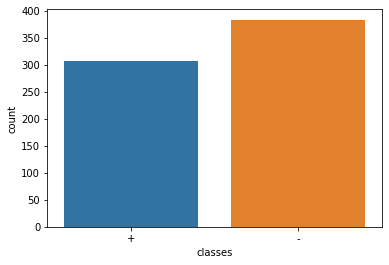

In [70]:
sb.countplot(data['classes'])
plt.show()

In [6]:
data.head().isnull().any().any()

False

In [7]:
data['A1'].value_counts()

b    468
a    210
?     12
Name: A1, dtype: int64

In [8]:
data[(data == '?')].any()

A1          True
A2          True
A3         False
A4          True
A5          True
A6          True
A7          True
A8         False
A9         False
A10        False
A11        False
A12        False
A13        False
A14         True
A15        False
classes    False
dtype: bool

In [36]:
df = pd.read_csv('crx.data', na_values=['?'], header = None)

In [37]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [38]:
df.columns = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8',
               'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'classes']

In [39]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,classes
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [40]:
df.isnull().any()

A1          True
A2          True
A3         False
A4          True
A5          True
A6          True
A7          True
A8         False
A9         False
A10        False
A11        False
A12        False
A13        False
A14         True
A15        False
classes    False
dtype: bool

In [41]:
df['A1'].unique()

array(['b', 'a', nan], dtype=object)

In [42]:
df.shape

(690, 16)

# Handling Missing Values

In [43]:
df['A2'].fillna(df['A2'].mean(), inplace=True)
df['A14'].fillna(df['A14'].mean(), inplace = True)

In [44]:
df=df.fillna(method='ffill')

In [45]:
df.isnull().any()

A1         False
A2         False
A3         False
A4         False
A5         False
A6         False
A7         False
A8         False
A9         False
A10        False
A11        False
A12        False
A13        False
A14        False
A15        False
classes    False
dtype: bool

In [46]:
df.dtypes

A1          object
A2         float64
A3         float64
A4          object
A5          object
A6          object
A7          object
A8         float64
A9          object
A10         object
A11          int64
A12         object
A13         object
A14        float64
A15          int64
classes     object
dtype: object

# Applying Standard Scalar

In [47]:
sc = StandardScaler()
for col in df:
    if (df[col].dtype == 'float64') or (df[col].dtype == 'int64'):
        df[[col]]=sc.fit_transform(df[[col]])


In [48]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,classes
0,b,-0.062321,-0.956613,u,g,w,v,-0.291083,t,t,-0.288101,f,g,0.104544,-0.195413,+
1,a,2.288101,-0.060051,u,g,q,h,0.244190,t,t,0.740830,f,g,-0.819689,-0.087852,+
2,a,-0.596738,-0.856102,u,g,q,h,-0.216324,t,f,-0.493887,f,g,0.557942,-0.037144,+
3,b,-0.315599,-0.647038,u,g,w,v,0.456505,t,t,0.535044,t,g,-0.488360,-0.194837,+
4,b,-0.962303,0.174141,u,g,w,v,-0.153526,t,f,-0.493887,f,s,-0.372104,-0.195413,+


# Applying label Encoding

In [49]:
le = LabelEncoder()
for col in df:
    if df[col].dtype == 'object':
        df[[col]] = le.fit_transform(df[[col]])

In [50]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,classes
0,1,-0.062321,-0.956613,1,0,12,7,-0.291083,1,1,-0.288101,0,0,0.104544,-0.195413,0
1,0,2.288101,-0.060051,1,0,10,3,0.244190,1,1,0.740830,0,0,-0.819689,-0.087852,0
2,0,-0.596738,-0.856102,1,0,10,3,-0.216324,1,0,-0.493887,0,0,0.557942,-0.037144,0
3,1,-0.315599,-0.647038,1,0,12,7,0.456505,1,1,0.535044,1,0,-0.488360,-0.194837,0
4,1,-0.962303,0.174141,1,0,12,7,-0.153526,1,0,-0.493887,0,2,-0.372104,-0.195413,0


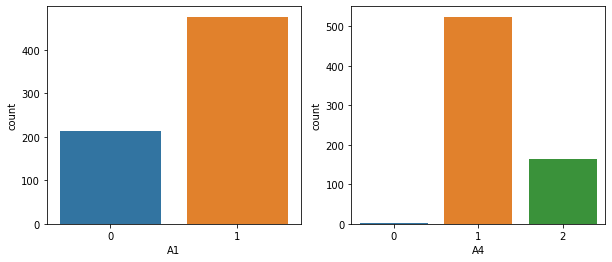

In [51]:
fig = plt.figure(figsize = (10,4))
f1 = fig.add_subplot(1,2,1)
f2 = fig.add_subplot(1,2,2)
sb.countplot(df['A1'], ax = f1)
sb.countplot(df['A4'], ax = f2)
plt.show()

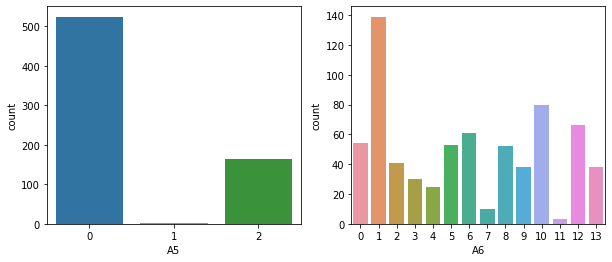

In [52]:
fig = plt.figure(figsize = (10,4))
f1 = fig.add_subplot(1,2,1)
f2 = fig.add_subplot(1,2,2)
sb.countplot(df['A5'], ax = f1)
sb.countplot(df['A6'], ax = f2)
plt.show()

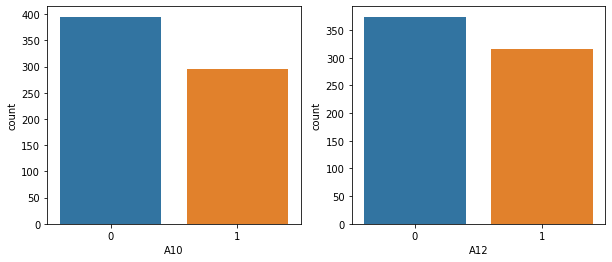

In [53]:
fig = plt.figure(figsize = (10,4))
f1 = fig.add_subplot(1,2,1)
f2 = fig.add_subplot(1,2,2)
sb.countplot(df['A10'], ax = f1)
sb.countplot(df['A12'], ax = f2)
plt.show()

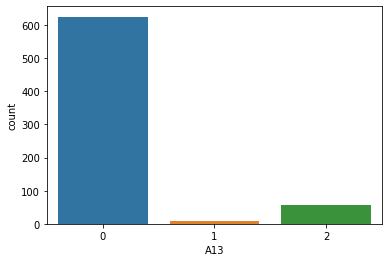

In [54]:
sb.countplot(df['A13'])
plt.show()

# Applying One Hot Encoding

From the above graphs we can see that only columns A4, A5, A6, A7 and A13 have more than 2 categories 

In [55]:
X = df.iloc[:, 0:-1]
Y = df.iloc[:,-1:]

In [56]:
X.shape, Y.shape

((690, 15), (690, 1))

In [61]:
ohe = OneHotEncoder(categorical_features = [3, 4, 5, 6, 12])
X = ohe.fit_transform(X).toarray()

In [62]:
X[0]

array([ 0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  1.        , -0.0623209 , -0.95661321,
       -0.29108264,  1.        ,  1.        , -0.28810053,  0.        ,
        0.10454433, -0.19541334])

In [63]:
X.shape

(690, 42)

# Splitting data in to training and testing

In [64]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [65]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((552, 42), (138, 42), (552, 1), (138, 1))

# Initialising the ANN

In [69]:
model = Sequential()

# Adding Hidden Layers

In [71]:
model.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 42))
model.add(Dense(output_dim = 6, init = 'uniform', activation = 'sigmoid'))

# Adding Output Layer

In [72]:
model.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compile the Artificial Neural network

In [73]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [74]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 258       
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 307
Trainable params: 307
Non-trainable params: 0
_________________________________________________________________


# Fitting the ANN to the training set 

In [75]:
model.fit(x_train, y_train, batch_size = 20, nb_epoch = 100)


Epoch 1/100
552/552 [==============================] - 2s 4ms/step - loss: 0.6919 - acc: 0.5525
Epoch 2/100
552/552 [==============================] - 0s 95us/step - loss: 0.6900 - acc: 0.5525
Epoch 3/100
552/552 [==============================] - 0s 100us/step - loss: 0.6885 - acc: 0.5525
Epoch 4/100
552/552 [==============================] - 0s 78us/step - loss: 0.6856 - acc: 0.5525
Epoch 5/100
552/552 [==============================] - 0s 78us/step - loss: 0.6808 - acc: 0.5525
Epoch 6/100
552/552 [==============================] - 0s 77us/step - loss: 0.6729 - acc: 0.5525
Epoch 7/100
552/552 [==============================] - 0s 72us/step - loss: 0.6589 - acc: 0.5525
Epoch 8/100
552/552 [==============================] - 0s 85us/step - loss: 0.6400 - acc: 0.5779
Epoch 9/100
552/552 [==============================] - 0s 71us/step - loss: 0.6185 - acc: 0.6250
Epoch 10/100
552/552 [==============================] - 0s 72us/step - loss: 0.5955 - acc: 0.7319
Epoch 11/100
552/552 [======

552/552 [==============================] - 0s 92us/step - loss: 0.2827 - acc: 0.8949
Epoch 83/100
552/552 [==============================] - 0s 126us/step - loss: 0.2828 - acc: 0.8967
Epoch 84/100
552/552 [==============================] - 0s 112us/step - loss: 0.2828 - acc: 0.8967
Epoch 85/100
552/552 [==============================] - 0s 109us/step - loss: 0.2828 - acc: 0.8967
Epoch 86/100
552/552 [==============================] - 0s 107us/step - loss: 0.2823 - acc: 0.8967
Epoch 87/100
552/552 [==============================] - 0s 75us/step - loss: 0.2816 - acc: 0.9022
Epoch 88/100
552/552 [==============================] - 0s 77us/step - loss: 0.2814 - acc: 0.8967
Epoch 89/100
552/552 [==============================] - 0s 82us/step - loss: 0.2812 - acc: 0.8986
Epoch 90/100
552/552 [==============================] - 0s 56us/step - loss: 0.2806 - acc: 0.8967
Epoch 91/100
552/552 [==============================] - 0s 189us/step - loss: 0.2813 - acc: 0.8967
Epoch 92/100
552/552 [======

# Predicting the Test set Result

In [76]:
y_pred = model.predict_classes(x_test)

In [78]:
y_pred[0:5]

array([[0],
       [0],
       [0],
       [0],
       [1]], dtype=int32)

In [81]:
score = accuracy_score(y_test, y_pred)
score

0.8333333333333334

In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80        60
           1       0.84      0.87      0.86        78

    accuracy                           0.83       138
   macro avg       0.83      0.83      0.83       138
weighted avg       0.83      0.83      0.83       138



In [83]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[47, 13],
       [10, 68]])

# Predicting the result for one input example

In [92]:
df.iloc[45, -1:]

classes    0.0
Name: 45, dtype: float64

# Applying one hot encoding to row number 45 as the values are already scaled and label encoded. Also the output value is 0.0 i.e class '+'

In [95]:
example = df.iloc[45, 0:-1].values

In [96]:
example

array([ 1.        ,  1.92169212,  0.40029219,  1.        ,  0.        ,
        1.        ,  3.        ,  0.12009082,  1.        ,  1.        ,
        1.76976039,  1.        ,  0.        , -1.06963892, -0.14086431])

In [98]:
example = ohe.transform([example]).toarray()

In [99]:
example

array([[ 0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  1.92169212,  0.40029219,
         0.12009082,  1.        ,  1.        ,  1.76976039,  1.        ,
        -1.06963892, -0.14086431]])

In [100]:
example.shape

(1, 42)

In [101]:
prediction = model.predict_classes(example)

In [102]:
prediction

array([[0]], dtype=int32)

In [104]:
if prediction:
    print('The class is -')
else:
    print('The class is +')

The class is +
